In [ ]:
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, binarize
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

print(tf.__version__)

2.7.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/My Drive/BAN 693/columnALL.csv')
df = df.iloc[:,1:] #removing the 1st index column

In [ ]:
df.head()

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_act_il,il_util,inq_fi,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,3600.0,36,13.99,123.03,3,10,MORTGAGE,55000.0,Paid,debt_consolidation,PA,5.91,0.0,2003,675.0,679.0,30.0,7.0,0.0,29.7,13.0,0.00,4421.72,3600.00,821.72,0.0,Individual,0.0,0.00,0.0,722.0,144904.0,2.0,36.0,3.0,37.2,0.0,0.0,1.0,2.0,2.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0
1,24700.0,36,11.99,820.28,3,10,MORTGAGE,65000.0,Paid,small_business,SD,16.06,1.0,1999,715.0,719.0,6.0,22.0,0.0,19.2,38.0,0.00,25679.66,24700.00,979.66,0.0,Individual,0.0,0.00,0.0,0.0,204396.0,1.0,73.0,0.0,27.1,0.0,0.0,4.0,0.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,7.7,0.0,0.0
2,20000.0,60,10.78,432.66,2,10,MORTGAGE,63000.0,Paid,home_improvement,IL,10.78,0.0,2000,695.0,699.0,0.0,6.0,0.0,56.2,18.0,0.00,22705.92,20000.00,2705.92,0.0,Joint App,71000.0,13.85,0.0,0.0,189699.0,1.0,73.0,2.0,55.9,0.0,0.0,5.0,0.0,2.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,50.0,0.0,0.0
3,35000.0,60,14.85,829.90,3,10,MORTGAGE,110000.0,Paid,debt_consolidation,NJ,17.06,0.0,2008,785.0,789.0,0.0,13.0,0.0,11.6,17.0,15897.65,31464.01,19102.35,12361.66,0.0,Individual,0.0,0.00,0.0,0.0,301500.0,1.0,70.0,0.0,12.1,0.0,0.0,1.0,0.0,4.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0
4,10400.0,60,22.45,289.91,6,3,MORTGAGE,104433.0,Paid,major_purchase,PA,25.37,1.0,1998,695.0,699.0,12.0,12.0,0.0,64.5,35.0,0.00,11740.50,10400.00,1340.50,0.0,Individual,0.0,0.00,0.0,0.0,331730.0,3.0,84.0,2.0,77.5,0.0,0.0,6.0,0.0,4.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,60.0,0.0,0.0


In [ ]:
#Data Cleaning

#removing some columns that are not necessary or highly correlated to each other
df.drop(['int_rate', 'installment','num_op_rev_tl','bc_util', 'num_actv_bc_tl','total_pymnt','num_sats','num_tl_30dpd', 'num_bc_tl'], axis=1, inplace=True)
#add average fico score value!
df['average_fico'] = df[['fico_range_low','fico_range_high']].mean(axis=1)
df.drop(['fico_range_low','fico_range_high'], axis=1, inplace=True)
df['dti'] = df['dti'].replace(np.nan, 999) #replacing DTI with 999 due to income being 1, thus DTI is 999
df = df.replace(np.nan, 0) #replace missing values with 0
df[df.isnull().any(axis=1)] #1,142,059 rows with a missing value out of 2,260,639

In [ ]:
df['dti'] = df['dti'].replace(np.nan, 999) #replacing DTI with 999 due to income being 1, thus DTI is 999

In [ ]:
df = df.replace(np.nan, 0) #replace missing values with 0

In [ ]:
df.isnull().sum(axis=0) #number of NAN values in the dataframe

In [ ]:
df[df.isnull().any(axis=1)] #1,142,059 rows with a missing value out of 2,260,639

,funded_amnt,term,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_rec_prncp,total_rec_int,total_rec_late_fee,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_act_il,il_util,inq_fi,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_bc_sats,num_il_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_120dpd_2m,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,average_fico


In [ ]:
df= pd.get_dummies(df, columns=['home_ownership','application_type','purpose','addr_state'], drop_first=True)
label_encoder = LabelEncoder()
df.loan_status = label_encoder.fit_transform(df.loan_status)

In [ ]:

#Creating a training and validation dataset with a 80/20 split
x_train,x_test, y_train, y_test = train_test_split(df.loc[:, df.columns !='loan_status'],df['loan_status'], test_size=0.2, random_state=1)#y-var split is dummy coded with the last 15 columns
#need to fix, just need loan status with y-var!!!!!!!!!!!!!!!!!

In [ ]:
#normalizing the data
scaler = StandardScaler()

scaledf = scaler.fit_transform(x_train.iloc[:,:-67])
x_train.iloc[:,:-67] = pd.DataFrame(scaledf, index=x_train.iloc[:,:-67].index, columns=x_train.iloc[:,:-67].columns)
#normalized all the data except the last columns because they're dummy coded
scaledf = scaler.fit_transform(x_test.iloc[:,:-67])
x_test.iloc[:,:-67] = pd.DataFrame(scaledf, index=x_test.iloc[:,:-67].index, columns=x_test.iloc[:,:-67].columns)


In [ ]:
initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)
l1_model = keras.Sequential([
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu,
                       #kernel_initializer=initializer,
                       input_shape=(x_train.shape[1],)),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(25, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(12, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(63, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(8, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(7, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(3, activation=tf.nn.softmax)
  ])

l1_model.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['Accuracy'])

In [ ]:
l1_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                1060      
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,133
Trainable params: 1,113
Non-trainable params: 20
_________________________________________________________________


In [ ]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback =  tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
#Determine baseline for accuracy of model
count = df.groupby('loan_status').count()
print(count)
len(df['loan_status']) #2,258,972
baseline = 1953504/2258972
baseline*100

             funded_amnt     term  ...  addr_state_WV  addr_state_WY
loan_status                        ...                              
0                 268531   268531  ...         268531         268531
1                  36937    36937  ...          36937          36937
2                1953504  1953504  ...        1953504        1953504

[3 rows x 105 columns]


86.47756590165793

In [ ]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


EPOCHS = 50
tf.random.set_seed(1)

# Store training stats
l1_history = l1_model.fit(x_train, y_train, 
                          epochs=EPOCHS,
                    validation_data= (x_test, y_test),
                    verbose=1,
                    callbacks=[callback, checkpoint])
                    

Epoch 1/50
56446/56475 [============================>.] - ETA: 0s - loss: 0.1981 - Accuracy: 0.9688
Epoch 00001: loss improved from inf to 0.19811, saving model to best_model.hdf5
56475/56475 [==============================] - 79s 1ms/step - loss: 0.1981 - Accuracy: 0.9688 - val_loss: 0.2002 - val_Accuracy: 0.9690
Epoch 2/50
56466/56475 [============================>.] - ETA: 0s - loss: 0.1817 - Accuracy: 0.9707
Epoch 00002: loss improved from 0.19811 to 0.18169, saving model to best_model.hdf5
56475/56475 [==============================] - 79s 1ms/step - loss: 0.1817 - Accuracy: 0.9707 - val_loss: 0.1655 - val_Accuracy: 0.9753
Epoch 3/50
56475/56475 [==============================] - ETA: 0s - loss: 0.1841 - Accuracy: 0.9713
Epoch 00003: loss did not improve from 0.18169
56475/56475 [==============================] - 88s 2ms/step - loss: 0.1841 - Accuracy: 0.9713 - val_loss: 0.2878 - val_Accuracy: 0.9584
Epoch 4/50
56460/56475 [============================>.] - ETA: 0s - loss: 0.1811 

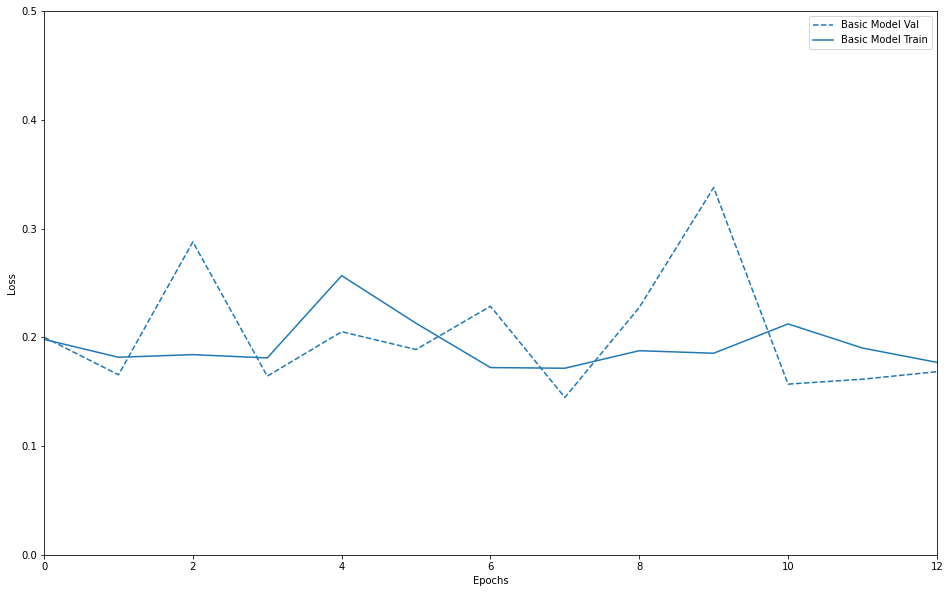

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(l1_history.epoch, l1_history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(l1_history.epoch, l1_history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(l1_history.epoch)])
  plt.ylim([0,0.5])

plot_history([('Basic Model', l1_history)])

In [ ]:
#l1_model.fit(x_train, y_train)
THRESHOLD = 0.5
y_pred = np.where(l1_model.predict(x_test)[:,1] >= THRESHOLD, 1, 0)
y_pred_proba_new_threshold = (l1_model.predict(x_test)[:,1] >= THRESHOLD).astype(int)

In [ ]:
y_pred = np.round(l1_model.predict(x_test),1)

In [ ]:
y_pred3 = np.round(l1_model.predict(x_test),3)

In [ ]:
 for i in range(a.shape[1]):
  if a[0,i]>0.5:
    Y_prediction[0,i] = 1
  else:
    Y_prediction[0,i] = 0

IndexError: ignored

In [ ]:
y_pred1

array([[0.   , 0.002, 0.998],
       [0.   , 0.   , 1.   ],
       [0.   , 0.001, 0.999],
       ...,
       [0.001, 0.03 , 0.969],
       [0.976, 0.001, 0.023],
       [0.013, 0.008, 0.979]], dtype=float32)

In [ ]:
multilabel_confusion_matrix(y_test.argmax(axis=1),np.rint(y_pred3).argmax(axis=1))


In [ ]:
newArray=[]
nArray=np.vectorize(newArray)
for i in y_pred:
    x = np.where(i == max(i))
    #print(x[0])
    newArray.append(int(x[0]))


TypeError: ignored

In [ ]:
newArray

In [ ]:
import numpy as np
a=np.array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])
np.where(a==1)[1]

array([2, 2, 2, 2, 0, 2])

In [ ]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)
print('Confusion Matrix')
print(multilabel_confusion_matrix(y_test_arg, Y_pred))


ValueError: ignored

In [ ]:
y_pred.shape

(406990,)

In [ ]:
x_test.shape

(451795, 105)

In [ ]:

#importing a 3-class dataset from sklearn's toy dataset
from sklearn.datasets import load_wine

#dataset = load_wine()
#X = dataset.data
#y = dataset.target
#from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#svc = SVC(kernel='rbf', C=1).fit(X_train, y_train)
#y_pred = np.round(l1_model.predict_on_batch(x_test),3)

#importing confusion matrix
from sklearn.metrics import multilabel_confusion_matrix
confusion = multilabel_confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

ValueError: ignored